In [1]:
# Imports
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading csv file
df = pd.read_csv('table-56.csv', skiprows=14)
df.columns = [i.replace(' ','_') for i in df.columns]
df.head()

,CAH_level_marker,CAH_level_subject,Level_of_qualification,Mode_of_study,Academic_Year,Disability_marker,Number
0,CAH level 1,01 Medicine and dentistry,All,Full-time,2020/21,Known to have a disability,2050
1,CAH level 1,01 Medicine and dentistry,All,Full-time,2020/21,No known disability,13400
2,CAH level 1,01 Medicine and dentistry,All,Full-time,2020/21,Total,15450
3,CAH level 1,01 Medicine and dentistry,All,Part-time,2020/21,Known to have a disability,215
4,CAH level 1,01 Medicine and dentistry,All,Part-time,2020/21,No known disability,3750


In [3]:
# Shape of data
df.shape

(23901, 7)

In [4]:
# Data information and datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23901 entries, 0 to 23900
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CAH_level_marker        23901 non-null  object
 1   CAH_level_subject       23901 non-null  object
 2   Level_of_qualification  23901 non-null  object
 3   Mode_of_study           23901 non-null  object
 4   Academic_Year           23901 non-null  object
 5   Disability_marker       23901 non-null  object
 6   Number                  23901 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [5]:
# Checking null values
df.isna().sum()

CAH_level_marker          0
CAH_level_subject         0
Level_of_qualification    0
Mode_of_study             0
Academic_Year             0
Disability_marker         0
Number                    0
dtype: int64

In [6]:
# Data Statistics
df.describe()

,Number
count,23901.000000
mean,5040.099996
std,32930.096055
min,0.000000
25%,30.000000
50%,185.000000
75%,1140.000000
max,872765.000000


In [7]:
# Data Statistics for categorical columns
df.describe(include='O')

,CAH_level_marker,CAH_level_subject,Level_of_qualification,Mode_of_study,Academic_Year,Disability_marker
count,23901,23901,23901,23901,23901,23901
unique,2,193,7,3,2,3
top,CAH level 3,Total,All,All,2020/21,Known to have a disability
freq,20751,252,3480,8049,11955,7967


### EDA

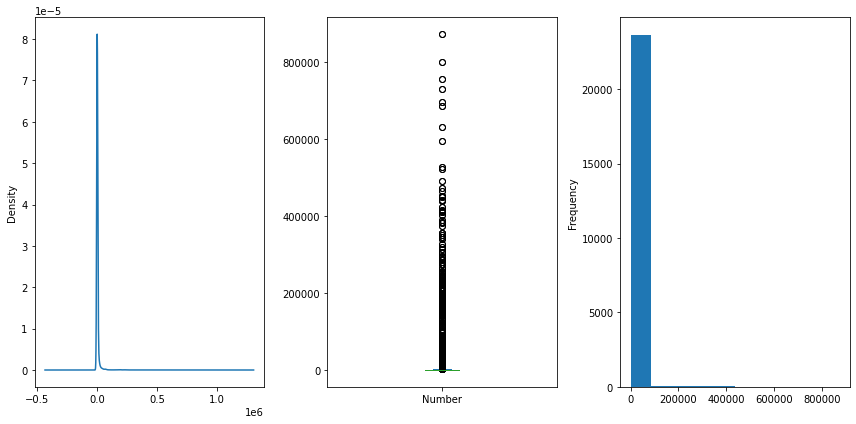

In [8]:
# Distributions
F,ax = plt.subplots(1,3, figsize=(12,6))
df.Number.plot.kde(ax=ax[0])
df.Number.plot.box(ax=ax[1])
df.Number.plot.hist(ax=ax[2])
plt.tight_layout()

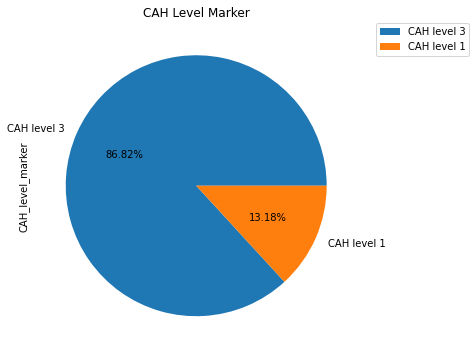

In [9]:
df.CAH_level_marker.value_counts().plot.pie(figsize=(8,6),autopct='%.2f%%', title='CAH Level Marker')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

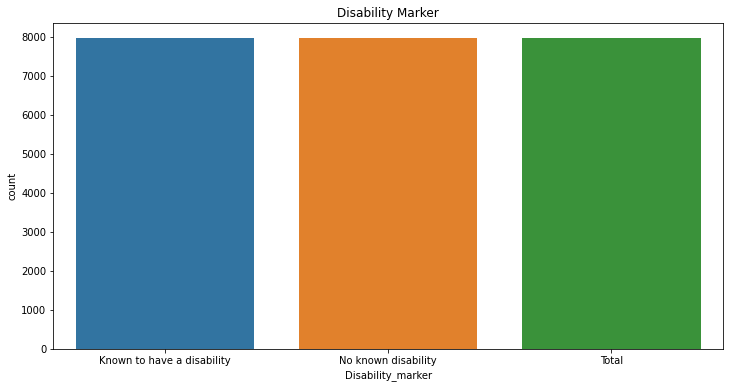

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(df.Disability_marker)
plt.title('Disability Marker')
plt.show()

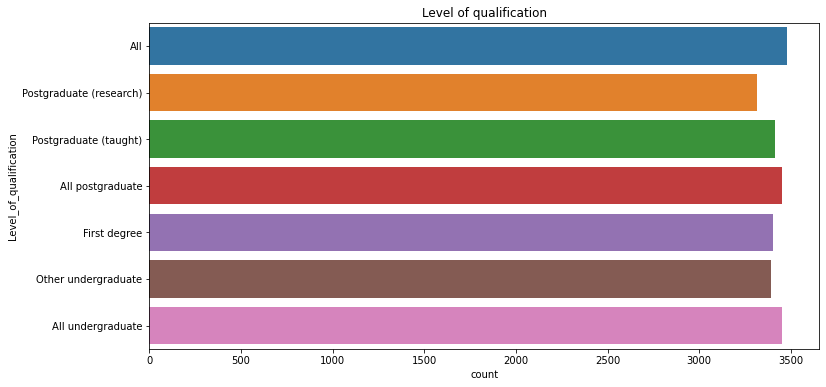

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(y=df.Level_of_qualification)
plt.title('Level of qualification')
plt.show()

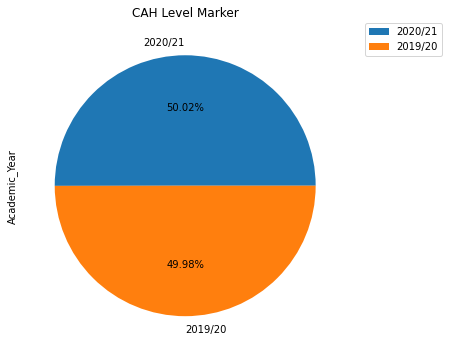

In [12]:
df.Academic_Year.value_counts().plot.pie(figsize=(8,6),autopct='%.2f%%', title='CAH Level Marker')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

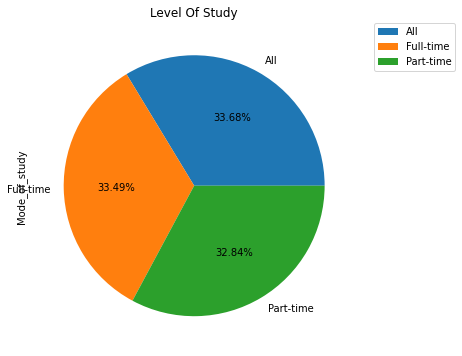

In [13]:
df.Mode_of_study.value_counts().plot.pie(figsize=(8,6),autopct='%.2f%%', title='Level Of Study')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Data Pre-Processing

In [14]:
def clear(value):
    '''
    Clearning extra numbers and dates before actual subject
    '''
    value = value.replace('-','').split(' ')
    new_value = [val for val in value if val.isalpha()]
    return ' '.join(new_value)
df.CAH_level_subject = df.CAH_level_subject.apply(lambda x: clear(x))

In [15]:
df_ = pd.get_dummies(df, drop_first=True)
df_.head()

,Number,CAH_level_marker_CAH level 3,CAH_level_subject_Adult nursing,CAH_level_subject_Aeronautical and aerospace engineering,CAH_level_subject_African and modern Middle Eastern studies,CAH_level_subject_Agricultural sciences,CAH_level_subject_Agriculture,CAH_level_subject_American and Australasian studies,CAH_level_subject_Animal science,CAH_level_subject_Anthropology,...,Level_of_qualification_All undergraduate,Level_of_qualification_First degree,Level_of_qualification_Other undergraduate,Level_of_qualification_Postgraduate (research),Level_of_qualification_Postgraduate (taught),Mode_of_study_Full-time,Mode_of_study_Part-time,Academic_Year_2020/21,Disability_marker_No known disability,Disability_marker_Total
0,2050,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,13400,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,15450,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,215,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,3750,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0


In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Standard Scaler
scaler = StandardScaler()

# Transforming into a dataframe
df_scaled = pd.DataFrame(scaler.fit_transform(df_), columns=df_.columns)
df_scaled.head()

,Number,CAH_level_marker_CAH level 3,CAH_level_subject_Adult nursing,CAH_level_subject_Aeronautical and aerospace engineering,CAH_level_subject_African and modern Middle Eastern studies,CAH_level_subject_Agricultural sciences,CAH_level_subject_Agriculture,CAH_level_subject_American and Australasian studies,CAH_level_subject_Animal science,CAH_level_subject_Anthropology,...,Level_of_qualification_All undergraduate,Level_of_qualification_First degree,Level_of_qualification_Other undergraduate,Level_of_qualification_Postgraduate (research),Level_of_qualification_Postgraduate (taught),Mode_of_study_Full-time,Mode_of_study_Part-time,Academic_Year_2020/21,Disability_marker_No known disability,Disability_marker_Total
0,-0.090803,-2.566636,-0.071923,-0.072799,-0.072799,-0.068307,-0.072799,-0.072799,-0.072799,-0.072799,...,-0.410726,-0.407381,-0.406543,-0.401288,-0.408009,1.409302,-0.699200,0.999624,-0.707107,-0.707107
1,0.253873,-2.566636,-0.071923,-0.072799,-0.072799,-0.068307,-0.072799,-0.072799,-0.072799,-0.072799,...,-0.410726,-0.407381,-0.406543,-0.401288,-0.408009,1.409302,-0.699200,0.999624,1.414214,-0.707107
2,0.316128,-2.566636,-0.071923,-0.072799,-0.072799,-0.068307,-0.072799,-0.072799,-0.072799,-0.072799,...,-0.410726,-0.407381,-0.406543,-0.401288,-0.408009,1.409302,-0.699200,0.999624,-0.707107,1.414214
3,-0.146529,-2.566636,-0.071923,-0.072799,-0.072799,-0.068307,-0.072799,-0.072799,-0.072799,-0.072799,...,-0.410726,-0.407381,-0.406543,-0.401288,-0.408009,-0.709571,1.430206,0.999624,-0.707107,-0.707107
4,-0.039178,-2.566636,-0.071923,-0.072799,-0.072799,-0.068307,-0.072799,-0.072799,-0.072799,-0.072799,...,-0.410726,-0.407381,-0.406543,-0.401288,-0.408009,-0.709571,1.430206,0.999624,1.414214,-0.707107


In [17]:
# Splitting Data

# Dividing columns to features and target
X = df_scaled.drop(['Number'], axis=1)
y = df_scaled.Number

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [18]:
# Importing Modules / Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Model Hypertuning
from sklearn.model_selection import RandomizedSearchCV

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
reg = LinearRegression()
reg.fit(X_train, y_train)

# making & storing predictions
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

# Model Evaluation

# Accuracy results
reg_train = {'R2': round(reg.score(X_train,y_train)*100,2),
             'MAE': round(mean_absolute_error(y_train,y_pred_train),2),
             'MSE':round(mean_squared_error(y_train,y_pred_train),2)}

reg_test = {'R2': round(reg.score(X_test,y_test)*100,2),
             'MAE': round(mean_absolute_error(y_test,y_pred),2),
             'MSE':round(mean_squared_error(y_test,y_pred),2)}


print('Training Accuracy:\nR2 Score:', reg_train['R2'],'%')
print('Mean Absolute Error:',reg_train['MAE'])
print('Mean Squared Error:',reg_train['MSE'])
print('='*50)    
print('Testing Accuracy:\nR2 Score:', reg_test['R2'],'%')
print('Mean Absolute Error:',reg_test['MAE'])
print('Mean Squared Error:',reg_test['MSE'])

Training Accuracy:
R2 Score: 38.88 %
Mean Absolute Error: 0.22
Mean Squared Error: 0.58
Testing Accuracy:
R2 Score: 38.86 %
Mean Absolute Error: 0.22
Mean Squared Error: 0.69


In [20]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

# making & storing predictions
y_pred_train = tree.predict(X_train)
y_pred = tree.predict(X_test)

# Model Evaluation

# Accuracy results
tree_train = {'R2': round(tree.score(X_train,y_train)*100,2),
             'MAE': round(mean_absolute_error(y_train,y_pred_train),2),
             'MSE':round(mean_squared_error(y_train,y_pred_train),2)}

tree_test = {'R2': round(tree.score(X_test,y_test)*100,2),
             'MAE': round(mean_absolute_error(y_test,y_pred),2),
             'MSE':round(mean_squared_error(y_test,y_pred),2)}


print('Training Accuracy:\nR2 Score:', tree_train['R2'],'%')
print('Mean Absolute Error:',tree_train['MAE'])
print('Mean Squared Error:',tree_train['MSE'])
print('='*50)    
print('Testing Accuracy:\nR2 Score:', tree_test['R2'],'%')
print('Mean Absolute Error:',tree_test['MAE'])
print('Mean Squared Error:',tree_test['MSE'])

Training Accuracy:
R2 Score: 100.0 %
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Testing Accuracy:
R2 Score: 98.58 %
Mean Absolute Error: 0.03
Mean Squared Error: 0.02


In [21]:
nn = MLPRegressor()
nn.fit(X_train, y_train)

# making & storing predictions
y_pred_train = nn.predict(X_train)
y_pred = nn.predict(X_test)

# Model Evaluation

# Accuracy results
nn_train = {'R2': round(nn.score(X_train,y_train)*100,2),
             'MAE': round(mean_absolute_error(y_train,y_pred_train),2),
             'MSE':round(mean_squared_error(y_train,y_pred_train),2)}

nn_test = {'R2': round(nn.score(X_test,y_test)*100,2),
             'MAE': round(mean_absolute_error(y_test,y_pred),2),
             'MSE':round(mean_squared_error(y_test,y_pred),2)}


print('Training Accuracy:\nR2 Score:', nn_train['R2'],'%')
print('Mean Absolute Error:',nn_train['MAE'])
print('Mean Squared Error:',nn_train['MSE'])
print('='*50)    
print('Testing Accuracy:\nR2 Score:', nn_test['R2'],'%')
print('Mean Absolute Error:',nn_test['MAE'])
print('Mean Squared Error:',nn_test['MSE'])

Training Accuracy:
R2 Score: 98.51 %
Mean Absolute Error: 0.08
Mean Squared Error: 0.01
Testing Accuracy:
R2 Score: 98.14 %
Mean Absolute Error: 0.09
Mean Squared Error: 0.02


In [22]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# making & storing predictions
y_pred_train = forest.predict(X_train)
y_pred = forest.predict(X_test)

# Model Evaluation

# Accuracy results
forest_train = {'R2': round(forest.score(X_train,y_train)*100,2),
             'MAE': round(mean_absolute_error(y_train,y_pred_train),2),
             'MSE':round(mean_squared_error(y_train,y_pred_train),2)}

forest_test = {'R2': round(forest.score(X_test,y_test)*100,2),
             'MAE': round(mean_absolute_error(y_test,y_pred),2),
             'MSE':round(mean_squared_error(y_test,y_pred),2)}


print('Training Accuracy:\nR2 Score:', forest_train['R2'],'%')
print('Mean Absolute Error:',forest_train['MAE'])
print('Mean Squared Error:',forest_train['MSE'])
print('='*50)    
print('Testing Accuracy:\nR2 Score:', forest_test['R2'],'%')
print('Mean Absolute Error:',forest_test['MAE'])
print('Mean Squared Error:',forest_test['MSE'])

Training Accuracy:
R2 Score: 99.77 %
Mean Absolute Error: 0.01
Mean Squared Error: 0.0
Testing Accuracy:
R2 Score: 98.65 %
Mean Absolute Error: 0.04
Mean Squared Error: 0.02


In [23]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# making & storing predictions
y_pred_train = knn.predict(X_train)
y_pred = knn.predict(X_test)

# Model Evaluation

# Accuracy results
knn_train = {'R2': round(knn.score(X_train,y_train)*100,2),
             'MAE': round(mean_absolute_error(y_train,y_pred_train),2),
             'MSE':round(mean_squared_error(y_train,y_pred_train),2)}

knn_test = {'R2': round(knn.score(X_test,y_test)*100,2),
             'MAE': round(mean_absolute_error(y_test,y_pred),2),
             'MSE':round(mean_squared_error(y_test,y_pred),2)}


print('Training Accuracy:\nR2 Score:', knn_train['R2'],'%')
print('Mean Absolute Error:',knn_train['MAE'])
print('Mean Squared Error:',knn_train['MSE'])
print('='*50)    
print('Testing Accuracy:\nR2 Score:', knn_test['R2'],'%')
print('Mean Absolute Error:',knn_test['MAE'])
print('Mean Squared Error:',knn_test['MSE'])

Training Accuracy:
R2 Score: 82.58 %
Mean Absolute Error: 0.07
Mean Squared Error: 0.17
Testing Accuracy:
R2 Score: 73.67 %
Mean Absolute Error: 0.1
Mean Squared Error: 0.3


In [24]:
svm = SVR()
svm.fit(X_train, y_train)

# making & storing predictions
y_pred_train = svm.predict(X_train)
y_pred = svm.predict(X_test)

# Model Evaluation

# Accuracy results
svm_train = {'R2': round(svm.score(X_train,y_train)*100,2),
             'MAE': round(mean_absolute_error(y_train,y_pred_train),2),
             'MSE':round(mean_squared_error(y_train,y_pred_train),2)}

svm_test = {'R2': round(svm.score(X_test,y_test)*100,2),
             'MAE': round(mean_absolute_error(y_test,y_pred),2),
             'MSE':round(mean_squared_error(y_test,y_pred),2)}


print('Training Accuracy:\nR2 Score:', svm_train['R2'],'%')
print('Mean Absolute Error:',svm_train['MAE'])
print('Mean Squared Error:',svm_train['MSE'])
print('='*50)    
print('Testing Accuracy:\nR2 Score:', svm_test['R2'],'%')
print('Mean Absolute Error:',svm_test['MAE'])
print('Mean Squared Error:',svm_test['MSE'])

Training Accuracy:
R2 Score: 38.32 %
Mean Absolute Error: 0.13
Mean Squared Error: 0.59
Testing Accuracy:
R2 Score: 34.43 %
Mean Absolute Error: 0.14
Mean Squared Error: 0.74
